# 49 Slicing GemPy Lith Blocks in PyVista with GemGIS

The lith block of a GemPy model can be loaded as volume into PyVista and be sliced to get geological cross sections. The different slicing options are introduced here. 

<img src="../images/tutorial49_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/49_slicing_gempy_lith_blocks_in_pyvista_with_gemgis/'

## Loading the lith block

The lith block of a computed GemPy model is loaded using NumPy and reshaped to the original dimensions (resolution) of the model.

In [4]:
import gemgis as gg
import pyvista as pv
import numpy as np

lith_block = np.load(file_path + 'lith_block.npy').reshape(50,50,50)
lith_block[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [3., 3., 3., ..., 2., 2., 1.],
       [3., 3., 3., ..., 2., 2., 2.],
       [3., 3., 3., ..., 2., 2., 2.]])

In [6]:
lith_block[lith_block == 1] = np.nan
lith_block

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 3.,  3.,  3., ...,  2.,  2., nan],
        [ 3.,  3.,  3., ...,  2.,  2.,  2.],
        [ 3.,  3.,  3., ...,  2.,  2.,  2.]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 3.,  3.,  3., ...,  2.,  2., nan],
        [ 3.,  3.,  3., ...,  2.,  2.,  2.],
        [ 3.,  3.,  3., ...,  2.,  2.,  2.]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 3.,  3.,  3., ...,  2.,  2., nan],
        [ 3.,  3.,  3., ...,  2.,  2.,  2.],
        [ 3.,  3.,  3., ...,  2.,  2.,  2.]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

## Wrapping the object

The array can now be wrapped using ``pv.wrap(..)``.

In [7]:
volume = pv.wrap(lith_block)
volume

UniformGrid (0x1503063bb80)
  N Cells:	117649
  N Points:	125000
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	0.000e+00, 4.900e+01
  Dimensions:	50, 50, 50
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	1

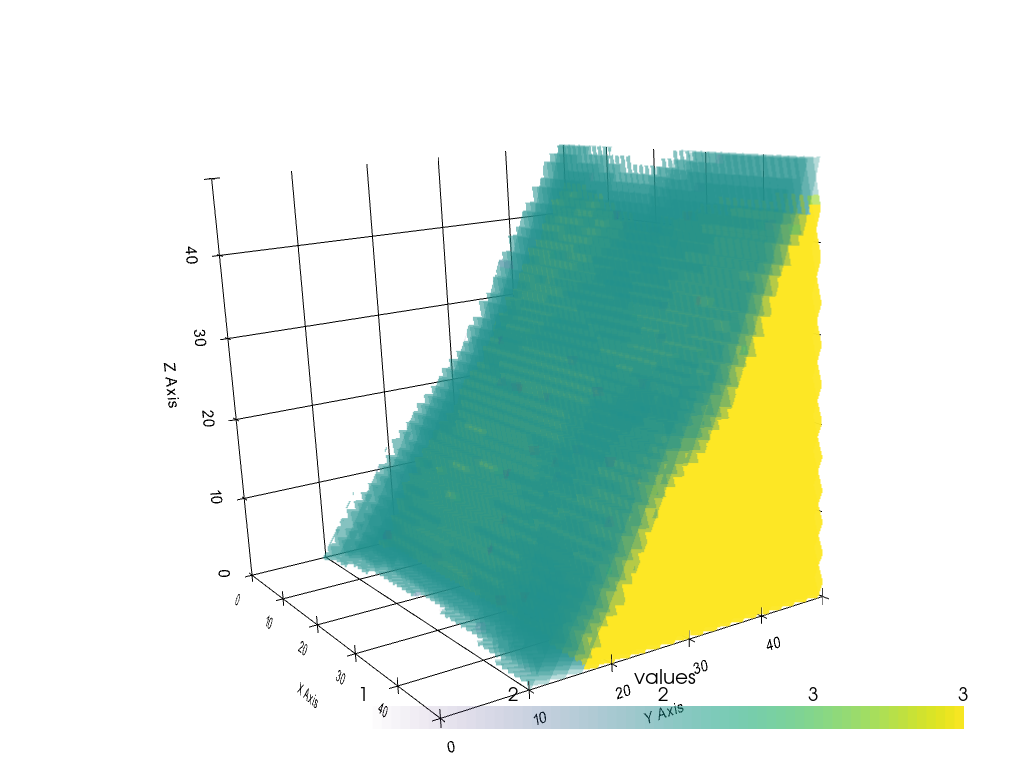

In [20]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_volume(volume, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Slicing the volume orthogonally 

When slicing the volume, a multi block object is being created where the different blocks represent the different slices.

In [22]:
slices = volume.slice_orthogonal()
slices

MultiBlock (0x15031ec3ee0)
  N Blocks:	3
  X Bounds:	0.000, 49.000
  Y Bounds:	0.000, 49.000
  Z Bounds:	0.000, 49.000

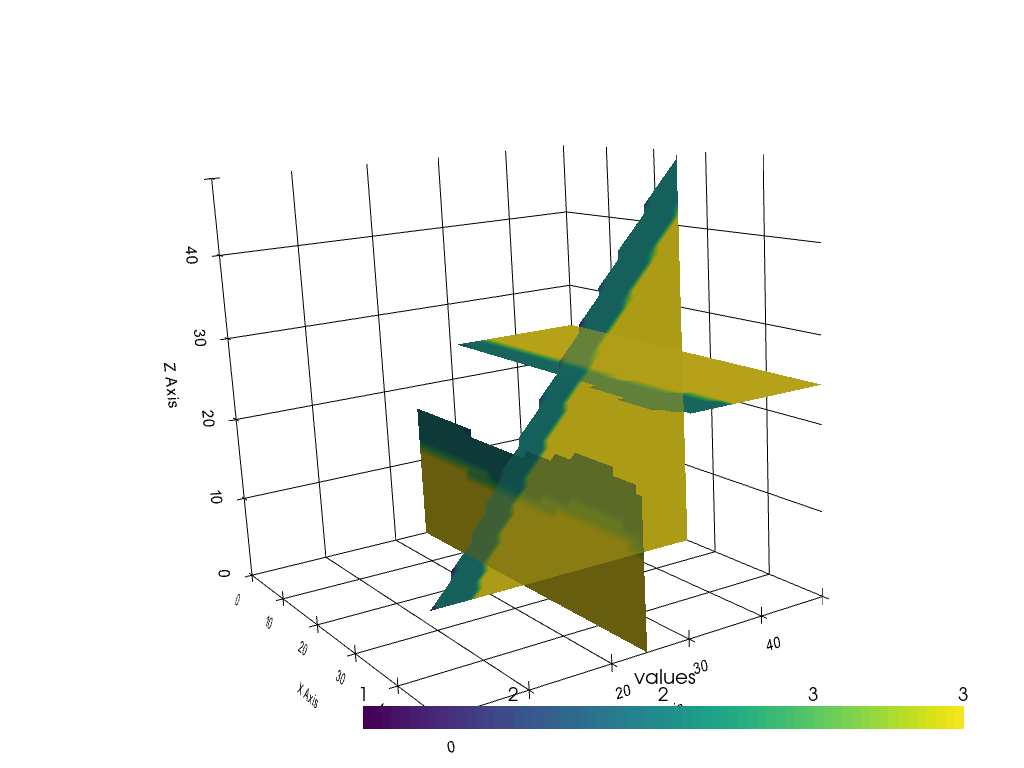

In [25]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(slices, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

In [30]:
slices = volume.slice_orthogonal(x=5, y=20, z=5)
slices

MultiBlock (0x150397d8580)
  N Blocks:	3
  X Bounds:	0.000, 49.000
  Y Bounds:	0.000, 49.000
  Z Bounds:	0.000, 49.000

The orthogonal slices can be easily translated throughout the volume

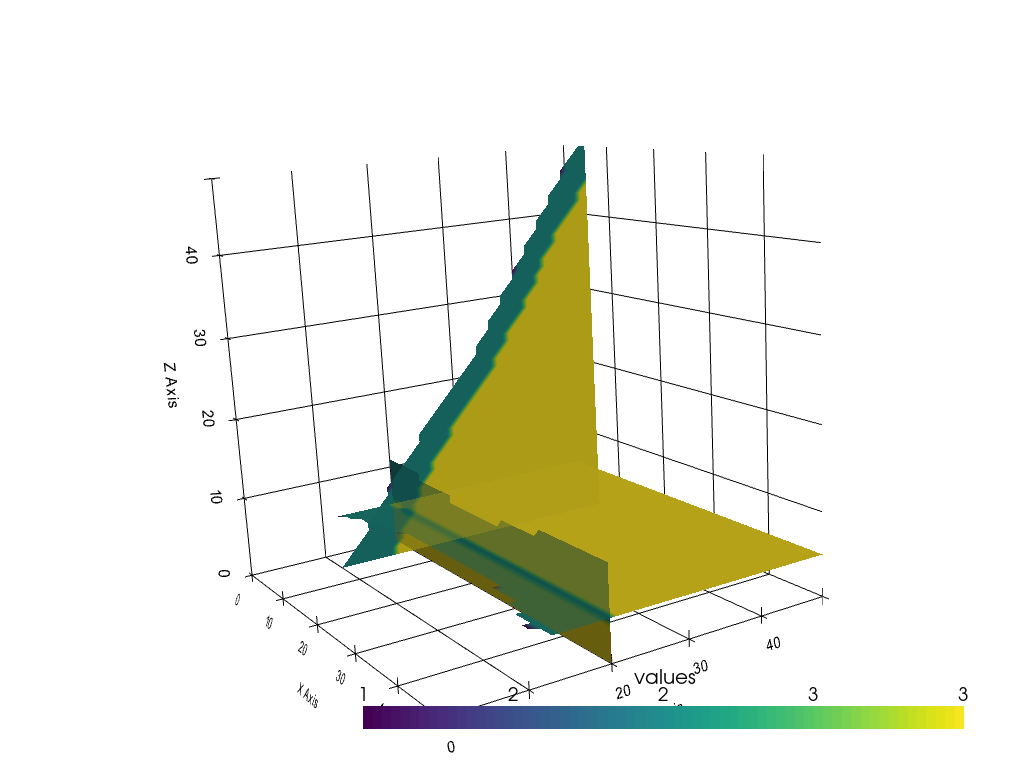

In [31]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(slices, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Adding single slices

Arbitrary single slices can also be extracted. The origin defaults to the center of the mesh.

In [38]:
single_slice1 = volume.slice(normal=[1, 1, 0])
single_slice1

PolyData (0x150464dbdc0)
  N Cells:	2401
  N Points:	2500
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	0.000e+00, 4.900e+01
  N Arrays:	1

In [52]:
single_slice2 = volume.slice(normal=[1, 0, 0])
single_slice2

PolyData (0x150409074c0)
  N Cells:	2401
  N Points:	2500
  X Bounds:	2.450e+01, 2.450e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	0.000e+00, 4.900e+01
  N Arrays:	1

In [53]:
single_slice3 = volume.slice(normal=[0, 1, 0])
single_slice3

PolyData (0x1504647e100)
  N Cells:	2401
  N Points:	2500
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	2.450e+01, 2.450e+01
  Z Bounds:	0.000e+00, 4.900e+01
  N Arrays:	1

In [54]:
single_slice4 = volume.slice(normal=[0, 0, 1])
single_slice4

PolyData (0x150409071c0)
  N Cells:	2401
  N Points:	2500
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	2.450e+01, 2.450e+01
  N Arrays:	1

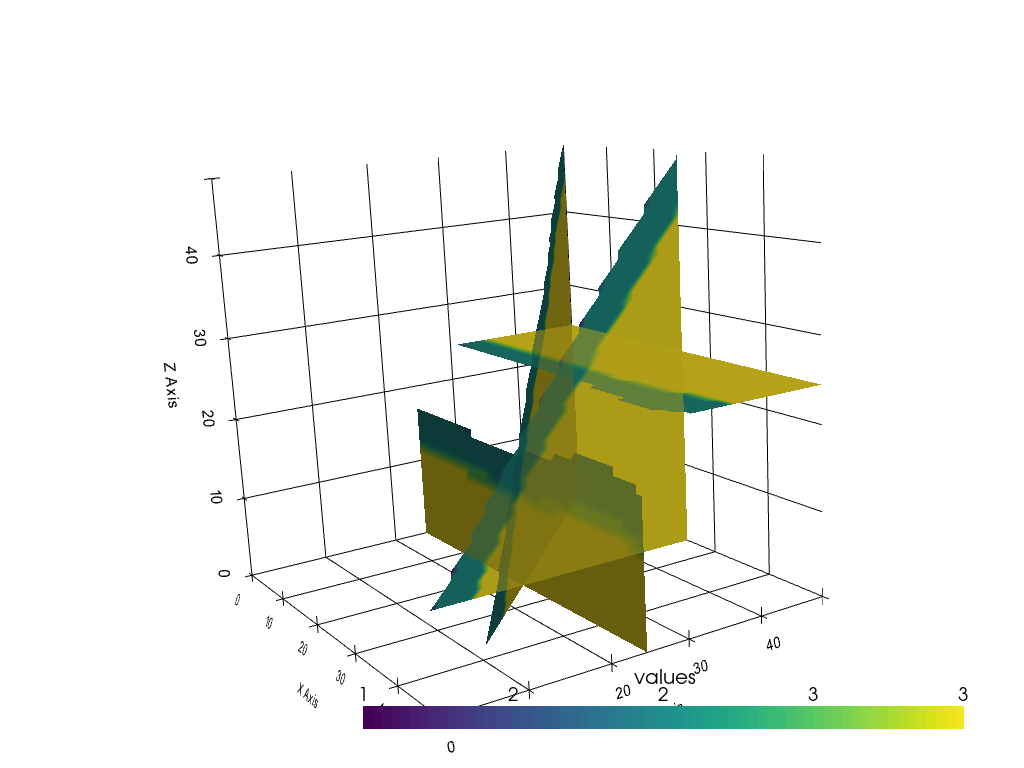

In [55]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(single_slice1, scalar_bar_args=sargs, nan_opacity=0)
p.add_mesh(single_slice2, scalar_bar_args=sargs, nan_opacity=0)
p.add_mesh(single_slice3, scalar_bar_args=sargs, nan_opacity=0)
p.add_mesh(single_slice4, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Slices uniformly accross an axial direction

Adding slicing planes uniformly across an axial direction can also be automated using ``slice_along_axis(..)``.

In [61]:
slices = volume.slice_along_axis(n=7, axis="x")
slices

MultiBlock (0x1503f388160)
  N Blocks:	7
  X Bounds:	0.490, 48.510
  Y Bounds:	0.000, 49.000
  Z Bounds:	0.000, 49.000

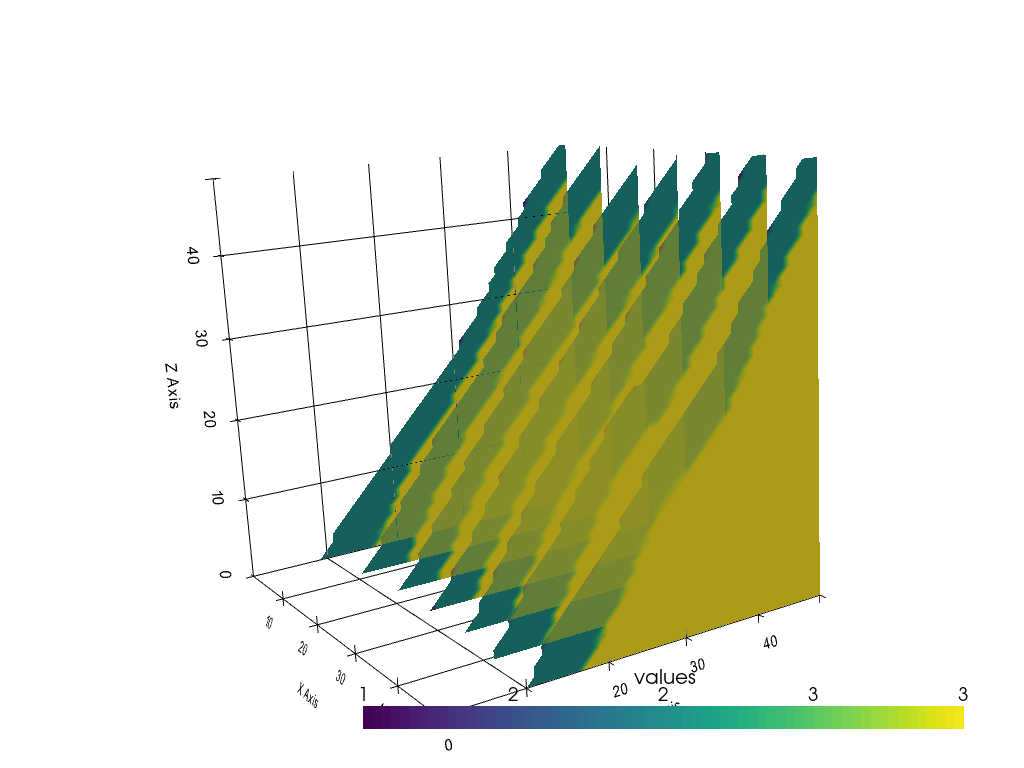

In [63]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(slices, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

In [64]:
slices = volume.slice_along_axis(n=7, axis="z")
slices

MultiBlock (0x15037066040)
  N Blocks:	7
  X Bounds:	0.000, 49.000
  Y Bounds:	0.000, 49.000
  Z Bounds:	0.490, 48.510

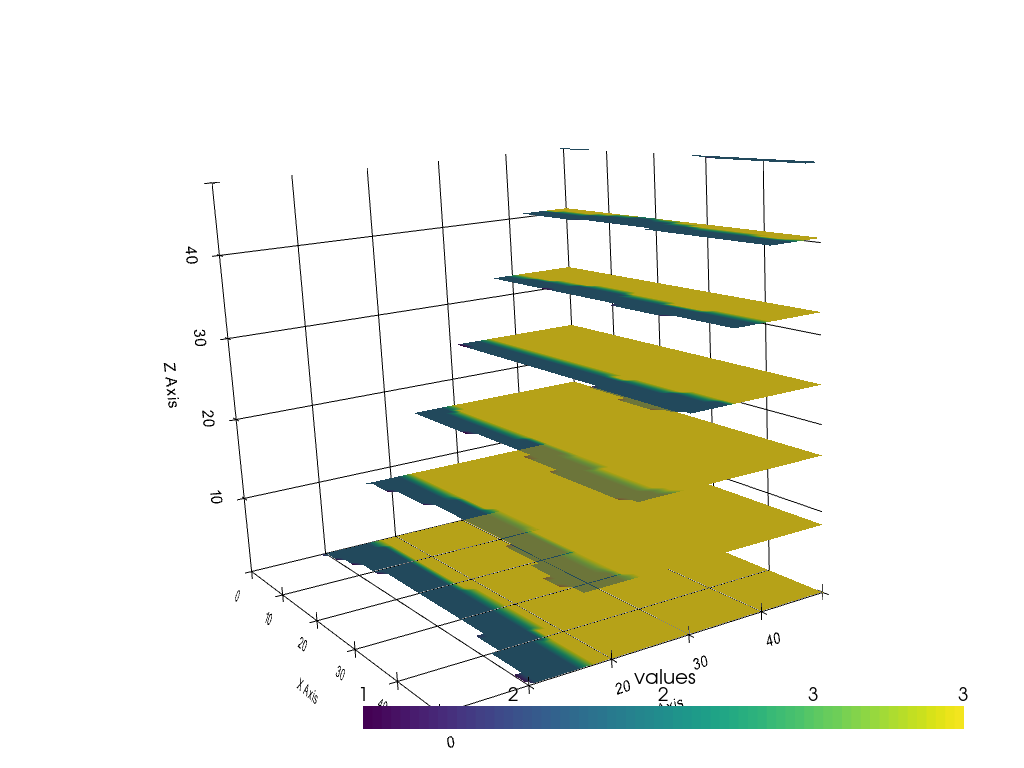

In [65]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_mesh(slices, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Cross section along a given LineString/Profile

A cross section can also be extracted along a predefined LineString, such as a Profile Line on the surface. 

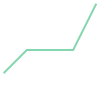

In [95]:
from shapely.geometry import LineString

linestring = LineString([(10,20,0), (20,30,0), (40,30,0), (50,50,0)])
linestring

In [96]:
np.asarray(linestring)

array([[10., 20.,  0.],
       [20., 30.,  0.],
       [40., 30.,  0.],
       [50., 50.,  0.]])

In [97]:
spline = pv.Spline(np.asarray(linestring), 15)
spline

PolyData (0x150372c1880)
  N Cells:	1
  N Points:	15
  X Bounds:	1.000e+01, 5.000e+01
  Y Bounds:	2.000e+01, 5.000e+01
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	1

In [98]:
slice = volume.slice_along_line(spline)
slice

PolyData (0x150372c1940)
  N Cells:	4459
  N Points:	4600
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	5.512e+00, 4.644e+01
  Z Bounds:	0.000e+00, 4.900e+01
  N Arrays:	1

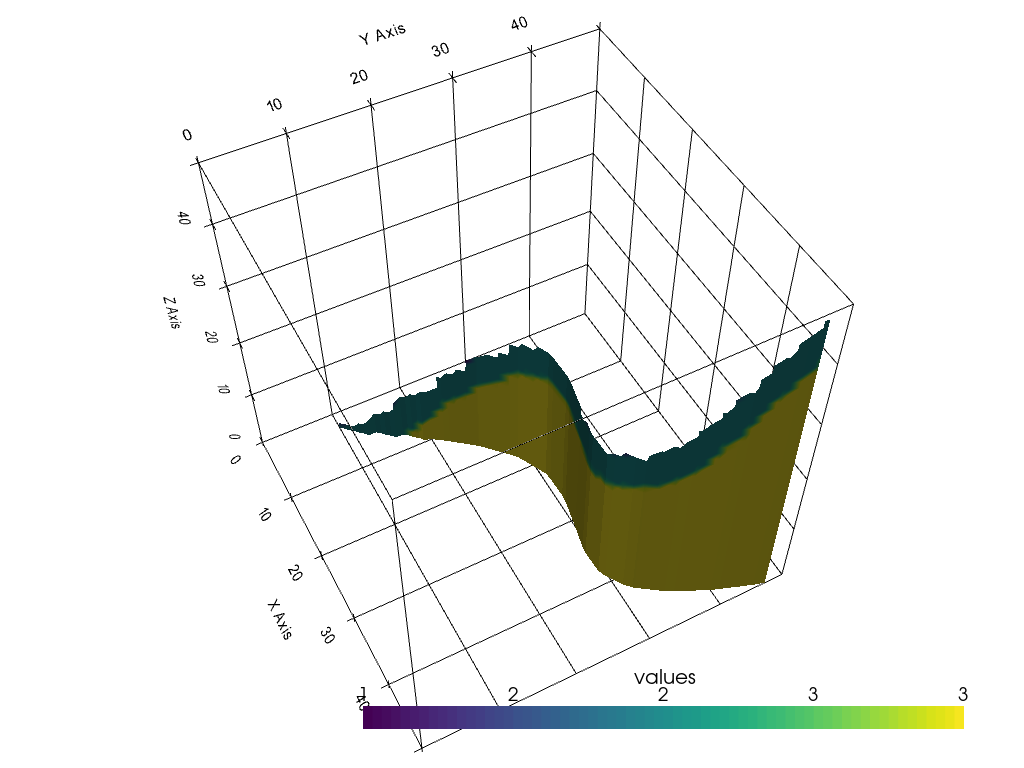

In [101]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(116.94895879808979, -23.54486636447751, 151.0971674252113), (24.5, 24.5, 24.5), (-0.6820986393942956, 0.36187292918718394, 0.6354442770675789)]
p.add_mesh(slice, scalar_bar_args=sargs, nan_opacity=0)

p.show_grid(color='black')
p.set_background(color='white')
p.add_mesh(volume.outline(), color="k")
p.show()